# Data Loading and Processing

### Libraries

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
data = ('Resources/crypto_data.csv')
crypto_df = pd.read_csv(data)

In [3]:
crypto_df.head(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,True,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [4]:
crypto_df.shape

(1252, 7)

In [5]:
crypto_df.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
IsTrading            0
ProofType            0
TotalCoinsMined    508
TotalCoinSupply      0
dtype: int64

In [6]:
# Drop all columns with at least one non value rows
crypto = crypto_df.dropna()
crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000


In [7]:
crypto.shape

(744, 7)

In [8]:
crypto.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [9]:
# Filter for cryptocurrencies that have been mined that are greater than zero(0)
crypto_filter = crypto.loc[(crypto["TotalCoinsMined"]>=0)]
crypto_filter

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...,...
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000


In [10]:
crypto_filter.shape

(743, 7)

In [11]:
# Drop irrelevant columns
crypto_filter = crypto_filter.drop(['CoinName', 'Unnamed: 0','IsTrading'], axis=1)
crypto_filter.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000


## A dtype function reveals that the TotalCoin Supply column is an object hence needs transform to a float since its too large.

In [12]:
crypto_filter["TotalCoinSupply"] = crypto_filter["TotalCoinSupply"].astype(str).astype(float)

In [13]:
crypto_filter

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
4,SHA-256,PoW/PoS,0.000000e+00,0.000000e+00
5,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,SHA-256,PoW,1.792718e+07,2.100000e+07
...,...,...,...,...
1242,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
1245,CryptoNight,PoW,9.802226e+08,1.400223e+09
1246,Equihash,PoW,7.296538e+06,2.100000e+07
1247,Scrypt,PoS,1.283270e+05,1.000000e+06


In [14]:
crypto_filter.duplicated()

0       False
2       False
4       False
5       False
7       False
        ...  
1242    False
1245    False
1246    False
1247    False
1248    False
Length: 743, dtype: bool

In [15]:
# drop y labels
crypto_df = crypto_filter.drop('Algorithm', axis=1)
crypto_df.head()

,ProofType,TotalCoinsMined,TotalCoinSupply
0,PoW/PoS,4.199995e+01,4.200000e+01
2,PoW/PoS,1.055185e+09,5.320000e+08
4,PoW/PoS,0.000000e+00,0.000000e+00
5,PoW/PoS,2.927942e+10,3.141593e+11
7,PoW,1.792718e+07,2.100000e+07


In [16]:
crypto_final = crypto_df.drop('ProofType',axis=1)
crypto_final

,TotalCoinsMined,TotalCoinSupply
0,4.199995e+01,4.200000e+01
2,1.055185e+09,5.320000e+08
4,0.000000e+00,0.000000e+00
5,2.927942e+10,3.141593e+11
7,1.792718e+07,2.100000e+07
...,...,...
1242,1.493105e+07,2.500000e+08
1245,9.802226e+08,1.400223e+09
1246,7.296538e+06,2.100000e+07
1247,1.283270e+05,1.000000e+06


In [17]:
# assign labels denoted by y to our train and test data sets
y_label = LabelEncoder().fit_transform(crypto_filter["Algorithm"])
y_label.shape

(743,)

In [18]:
X_crypto_df = pd.get_dummies((crypto_df), drop_first=True)
X_crypto_df.head()

,TotalCoinsMined,TotalCoinSupply,ProofType_DPoS,ProofType_DPoW,ProofType_HPoW,ProofType_LPoS,ProofType_POBh,ProofType_POS / MN,ProofType_PoA,ProofType_PoC,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X_crypto_df.shape

(743, 28)

In [20]:
#  Check the number of features
len(crypto_filter['Algorithm'].unique())

82

In [21]:
crypto_filter['Algorithm'].value_counts()

Scrypt              245
X11                 107
SHA-256              72
CryptoNight          24
X13                  24
                   ... 
Blake2S               1
TRC10                 1
Leased POS            1
X11GOST               1
CryptoNight-Lite      1
Name: Algorithm, Length: 82, dtype: int64

In [22]:
crypto_filter['Algorithm'].explode().unique()

array(['Scrypt', 'SHA-256', 'X13', 'Ethash', 'X11', 'CryptoNight-V7',
       'Equihash', 'SHA-512', 'Multiple', 'X15', 'Quark', 'Groestl',
       'PoS', 'NIST5', 'NeoScrypt', 'SHA3', 'HybridScryptHash256',
       'Scrypt-n', 'PHI1612', 'Lyra2REv2', 'CryptoNight', 'Shabal256',
       'Counterparty', 'Momentum', 'Stanford Folding', 'QuBit', 'M7 POW',
       'Lyra2RE', 'QUAIT', 'vDPOS', 'Blake2b', 'BLAKE256',
       '1GB AES Pattern Search', 'Blake', 'Dagger', 'CryptoNight-Lite',
       'X11GOST', 'ScryptOG', 'POS 3.0', 'SHA-256D', 'Lyra2Z', 'X14',
       'DPoS', 'Keccak', 'Dagger-Hashimoto', 'Blake2S', '536', 'Argon2d',
       'Cloverhash', 'Skein', 'Time Travel', 'SkunkHash v2 Raptor',
       'VeChainThor Authority', 'Ouroboros', 'POS 2.0', 'SkunkHash',
       'C11', 'Proof-of-BibleHash', 'SHA-256 + Hive',
       'Proof-of-Authority', 'XEVAN', 'VBFT', 'IMesh', 'X16S',
       'Green Protocol', 'Semux BFT consensus', 'X16R', 'Tribus',
       'CryptoNight Heavy', 'Jump Consistent Hash', 'H

## Apply PCA

In [23]:
# Standarize data with StandarScaler
X_scaled = StandardScaler().fit_transform(X_crypto_df)

In [24]:
X_scaled

array([[-0.10075505, -0.03671357, -0.11680139, ..., -0.03671115,
        -0.03671115, -0.03671115],
       [-0.07346881, -0.03671341, -0.11680139, ..., -0.03671115,
        -0.03671115, -0.03671115],
       [-0.10075505, -0.03671357, -0.11680139, ..., -0.03671115,
        -0.03671115, -0.03671115],
       ...,
       [-0.10056637, -0.03671357, -0.11680139, ..., -0.03671115,
        -0.03671115, -0.03671115],
       [-0.10075173, -0.03671357, -0.11680139, ..., -0.03671115,
        -0.03671115, -0.03671115],
       [-0.1001993 , -0.03671354, -0.11680139, ..., -0.03671115,
        -0.03671115, -0.03671115]])

#### Dimensionality Reduction7
##### Preserving 90% of total variance


In [25]:
# Initialize PCA model to reduce the number of dimensions in a dataset whilst retaining most information
pca = PCA(n_components=0.9)

# Get two principal components for the data.
X_crypto_pca = pca.fit_transform(X_scaled)
X_crypto_pca.shape

(743, 24)

In [26]:
X_crypto_pca.dtype

dtype('float64')

In [27]:
X_crypto_pca

array([[ 1.52892686e+00, -3.37302591e-01,  6.68015434e-01, ...,
         1.48298825e-11,  1.24743412e-11,  1.34767703e-12],
       [ 1.52840277e+00, -3.19072168e-01,  6.73223402e-01, ...,
         1.48303625e-11,  1.24738446e-11,  1.34748894e-12],
       [ 1.52892686e+00, -3.37302592e-01,  6.68015434e-01, ...,
         1.48303165e-11,  1.24737227e-11,  1.34750963e-12],
       ...,
       [-1.34363571e+00, -2.53817612e-01,  3.09589170e-01, ...,
         1.44144144e-15, -2.45638014e-16, -6.73763553e-16],
       [ 4.34705705e-01,  4.55422323e-01, -2.48746580e+00, ...,
         5.20746016e-15, -5.54739509e-16, -3.67943924e-15],
       [ 1.52891618e+00, -3.36931290e-01,  6.68121508e-01, ...,
         1.48303340e-11,  1.24738278e-11,  1.34743239e-12]])

##### Plot Data in new dimension

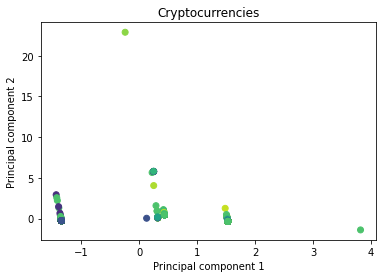

In [28]:
# Visualize the data
plt.scatter(x=X_crypto_pca[:,0],y=X_crypto_pca[:,1], c=y_label)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Cryptocurrencies')
plt.show()

It is oberved that, preserving a 90% of the explained variance in dimensionality reduction the number of Cryptocurrency features is dropped from 28 to 24. Further more,I think using the variance rule for dimensionality reduction for clustering is not appropriate.
Therefore, we carry out further reduction using t-SNE.

### Further Reduction Using t-SNE

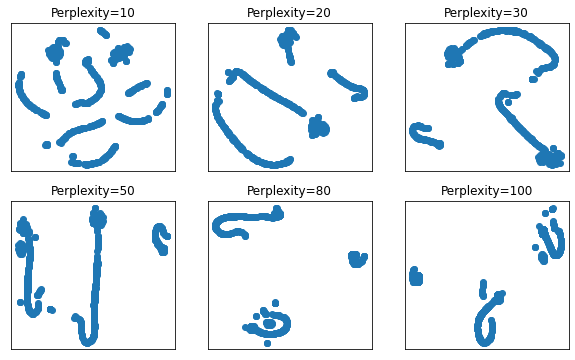

In [29]:

# Run t-SNE for different values of perplexity ( a tuneable parameter which provides a guess about the number of close neighbors each point has)
perplexity_list = [10, 20, 30, 50, 80, 100]
fig, axs = plt.subplots(2,3, figsize=(10,6))
axs = axs.ravel()
for i, p in enumerate(perplexity_list):
    tsne = TSNE(n_components=2, perplexity=p)
# Apply a fit-transform on the output of the PCA transformation
    tsne_features = tsne.fit_transform(X_crypto_pca)
    axs[i].scatter(tsne_features[:,0], tsne_features[:,1])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(f"Perplexity={p}")
plt.show()

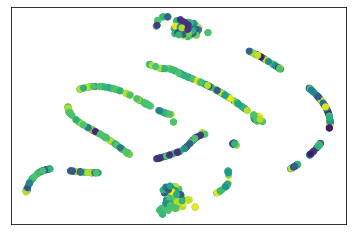

In [30]:
# Plot final t-SNE with labels
tsne = TSNE(n_components=2, perplexity=10)
tsne_features = tsne.fit_transform(X_crypto_pca)
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=y_label)
plt.xticks([])
plt.yticks([])
plt.show()

From the scatter plot output it is difficult to form a distinct cluster, which in this regards means the cryptocurriencies cannot form clusters. Also in comparison, there is no much difference in terms of clustering of the cryptocurrencies.

## Cluster Analysis with k-Means

#### Find the best number(s) of clusters using the elbow curve:

In [31]:
inertia = []
k_list = list(range(1, 10))

# Calculate the inertia for the range of k values
for k in k_list:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

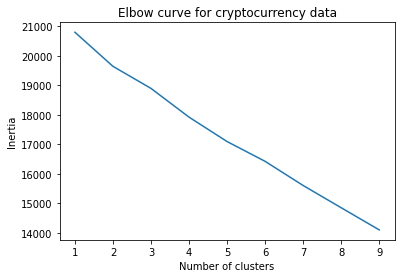

In [32]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(k_list, inertia)
plt.xticks(k_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for cryptocurrency data')
plt.show()

From the elbow curve for the crptocurrency data, It looks like there is no cluster structure in the data. A good model is one with low inertia and a low number of clusters (K).However, in this case we observe a very high inertia values with no elbow observed. In this circumstance we assume a k-Mean of 2  to fit the model.

In [39]:
# Fit model
model = KMeans(n_clusters=2, random_state=42)

model


KMeans(n_clusters=2, random_state=42)

In [40]:
model.fit(crypto_final)

KMeans(n_clusters=2, random_state=42)

In [41]:
# Get predictions
predictions = model.predict(crypto_final)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [42]:
# Add a new class column to df_iris
crypto_final["Algorithm"] = predictions
crypto_final.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm
0,4.199995e+01,4.200000e+01,0
2,1.055185e+09,5.320000e+08,0
4,0.000000e+00,0.000000e+00,0
5,2.927942e+10,3.141593e+11,0
7,1.792718e+07,2.100000e+07,0


In [43]:
# Add predictions
crypto_final["Algorithm"] = model.predict(crypto_final).astype("str")



In [44]:
crypto_final["Algorithm"].value_counts()

0    742
1      1
Name: Algorithm, dtype: int64

In [45]:
# Check the centroids
model.cluster_centers_

array([[ 3.90154547e+09,  8.17347424e+09, -3.25260652e-18],
       [ 0.00000000e+00,  9.22337200e+16,  1.00000000e+00]])

In [46]:
# Check the inertia
model.inertia_

3.5952072391286863e+24

In [47]:
# Add predictions
crypto_final["Algorithm"] = model.predict(crypto_final).astype("str")

In [48]:
crypto_final.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm
0,4.199995e+01,4.200000e+01,0
2,1.055185e+09,5.320000e+08,0
4,0.000000e+00,0.000000e+00,0
5,2.927942e+10,3.141593e+11,0
7,1.792718e+07,2.100000e+07,0


# Recommendation

The analysis carried out to determine if there is any underlying data structure based on the Algorithm of the cryptocurrencies almost looks impossible based on the models (PCA, t-SNE and K-Means) employed in this work. On a global scale, a perplexity of about 100 provide a meaningfull cluster for the algorithms, however a model predictions based on assumption of 2 clusters is difficult to see on the elbow curve (showing close to a straight line) gives an indication that the algorithms employed in building the cryptocurrencies is not relational. Also it is important to state that when fiiting the layers the data is skewed towards a one dimension and hence a time series analysis will be the best way to observe how these algorithm performs.